In [1]:
import kagglehub
path = kagglehub.dataset_download("anshulmehtakaggl/wildlife-animals-images")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\bence\.cache\kagglehub\datasets\anshulmehtakaggl\wildlife-animals-images\versions\43


In [2]:
import matplotlib.pyplot as plt
from glob import glob
plt.style.use('seaborn-v0_8-whitegrid')
from torchvision import transforms
import numpy as np
from torch.utils.data import DataLoader
from utils import config, AnimalDataset
from zoo import AnimalModel
from PIL import Image


In [3]:
classPaths = glob(f'{path}/*-{config.image_size}')
for cp in classPaths:
  print(glob(f'{cp}/*{config.image_size}'))

['C:\\Users\\bence\\.cache\\kagglehub\\datasets\\anshulmehtakaggl\\wildlife-animals-images\\versions\\43\\cheetah-resize-224\\resize-224']
['C:\\Users\\bence\\.cache\\kagglehub\\datasets\\anshulmehtakaggl\\wildlife-animals-images\\versions\\43\\fox-resize-224\\fox-resize-224']
['C:\\Users\\bence\\.cache\\kagglehub\\datasets\\anshulmehtakaggl\\wildlife-animals-images\\versions\\43\\hyena-resize-224\\resize-224']
['C:\\Users\\bence\\.cache\\kagglehub\\datasets\\anshulmehtakaggl\\wildlife-animals-images\\versions\\43\\lion-resize-224\\lion-resize-224']
['C:\\Users\\bence\\.cache\\kagglehub\\datasets\\anshulmehtakaggl\\wildlife-animals-images\\versions\\43\\tiger-resize-224\\tiger-resize-224']
['C:\\Users\\bence\\.cache\\kagglehub\\datasets\\anshulmehtakaggl\\wildlife-animals-images\\versions\\43\\wolf-resize-224\\wolf-resize-224']


In [4]:
label_map = {0:'cheetah',1:'fox',2:'hyena',3:'lion',4:'tiger',5:'wolf'}

In [5]:
allPaths = []
for cp in classPaths:
  allPaths.append(glob(f'{cp}/*{config.image_size}/*'))
  print(len(glob(f'{cp}/*{config.image_size}/*')))


343
250
306
294
269
263


In [6]:
for ap in allPaths:
    for path in ap:
        try:
            Image.open(path)
        except:
            print(f"Corrupted image: {path}")
            ap.remove(path)
            continue


Corrupted image: C:\Users\bence\.cache\kagglehub\datasets\anshulmehtakaggl\wildlife-animals-images\versions\43\cheetah-resize-224\resize-224\00000244_224resized.png
Corrupted image: C:\Users\bence\.cache\kagglehub\datasets\anshulmehtakaggl\wildlife-animals-images\versions\43\hyena-resize-224\resize-224\00000224_224resized.png


In [7]:
trainPaths =  np.array([ap[:config.trainSamples] for ap in allPaths]).flatten()
trainPaths.shape
valPaths =  np.array([ap[config.trainSamples:config.trainSamples+50] for ap in allPaths]).flatten()
valPaths.shape

(300,)

In [8]:
trainDataset = AnimalDataset(trainPaths,labelMap=label_map)
trainLoader = DataLoader(trainDataset,batch_size=config.batch_size,shuffle=True)
valDataset = AnimalDataset(valPaths,labelMap=label_map)
valLoader = DataLoader(valDataset,batch_size=config.batch_size,shuffle=False)

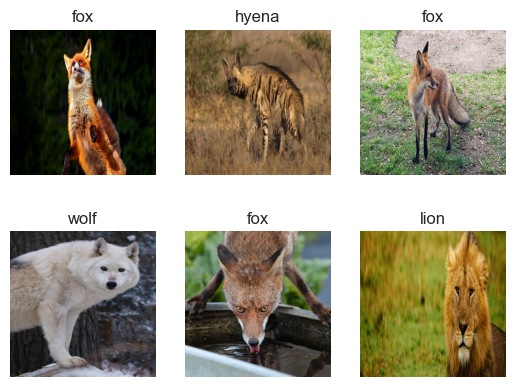

In [9]:
imgs, labels = next(iter(trainLoader))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(imgs[i].permute(1,2,0))
  plt.title(label_map[labels[i].item()])
  plt.axis('off')

In [16]:
from zoo import Trainer
import torch.nn.functional as F
import torch
from torch.utils.tensorboard import SummaryWriter

In [ ]:

model = AnimalModel()
criterion = F.cross_entropy
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)
writer = SummaryWriter()


In [18]:
trainer = Trainer(criterion=criterion,device = device,writer = writer)

In [19]:
trainer.train(model,train_loader=trainLoader,num_epochs=config.num_epochs,val_loader=valLoader)

AttributeError: 'Config' object has no attribute 'epochs'